#BIKE

## Carregar base de Dados

In [25]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [26]:
data = pd.read_csv('Bike.csv', index_col=0)
data.head()

,cnt,season,holliday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
id,,,,,,,,,,
399,4151,1,0,5,1,1,0.313333,0.309346,0.526667,0.178496
590,6544,3,0,0,0,1,0.700833,0.644579,0.530417,0.122512
80,2077,2,0,1,1,2,0.430435,0.409735,0.737391,0.288783
144,4492,2,0,2,1,2,0.660000,0.604813,0.740833,0.207092
398,3761,1,0,4,1,2,0.399167,0.398971,0.672917,0.187187


In [27]:
data.shape

(229, 10)

In [28]:
data.describe()

,cnt,season,holliday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,3763.698690,2.148472,0.043668,2.864629,0.641921,1.537118,0.438492,0.421695,0.646899,0.198839
std,1703.653124,1.110066,0.204803,2.044251,0.480486,0.573289,0.189875,0.170820,0.156110,0.078914
min,441.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.096522,0.098839,0.275833,0.042304
25%,2177.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.287500,0.280933,0.522500,0.146142
50%,4073.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.403333,0.400118,0.650417,0.189067
75%,5146.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.604167,0.565067,0.776522,0.240050
max,6879.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.834167,0.786613,0.949583,0.422275


In [29]:
data = pd.get_dummies(data=data, columns=['season', 'weekday', 'weathersit'], drop_first=True)

In [30]:
data.head()

,cnt,holliday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
id,,,,,,,,,,,,,,,,,,
399,4151,0,1,0.313333,0.309346,0.526667,0.178496,0,0,0,0,0,0,0,1,0,0,0
590,6544,0,0,0.700833,0.644579,0.530417,0.122512,0,1,0,0,0,0,0,0,0,0,0
80,2077,0,1,0.430435,0.409735,0.737391,0.288783,1,0,0,1,0,0,0,0,0,1,0
144,4492,0,1,0.660000,0.604813,0.740833,0.207092,1,0,0,0,1,0,0,0,0,1,0
398,3761,0,1,0.399167,0.398971,0.672917,0.187187,0,0,0,0,0,0,1,0,0,1,0


## Separar base em treino e teste

In [31]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'cnt']  # Entrada
y = data.cnt    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(183, 17)
(46, 17)
(183,)
(46,)


##Machine Learning: Árvore de Decisão

In [33]:
# treinar modelo
from sklearn.tree import DecisionTreeRegressor

def train_and_predict(X_train, y_train, X_test):
  model = DecisionTreeRegressor()
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste
  return model, y_pred

model, y_pred = train_and_predict(X_train, y_train, X_test)

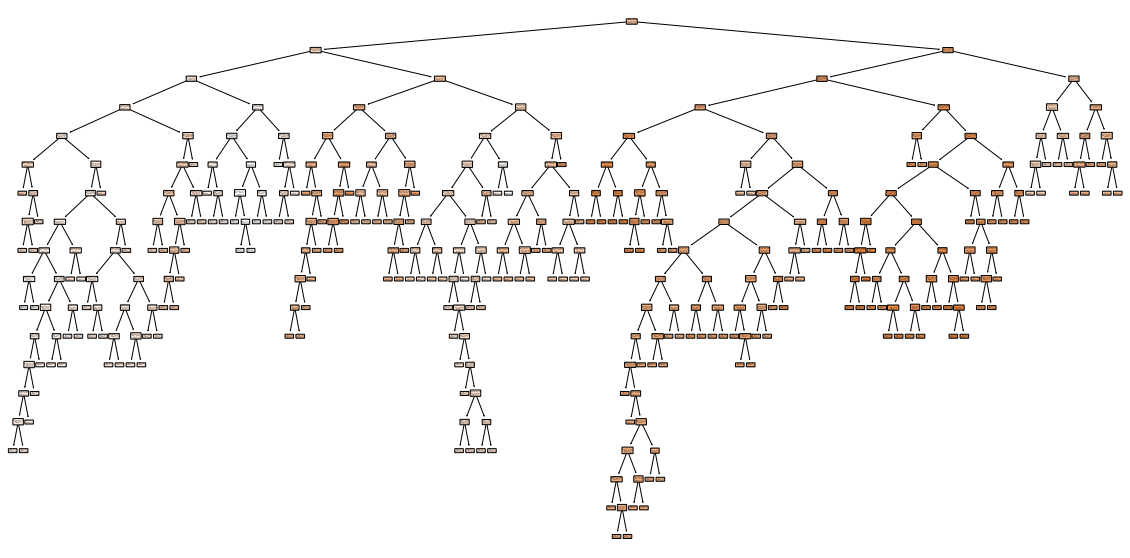

In [34]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
plot_tree(model, filled=True, rounded=True, feature_names=X_train.columns); # plota a árvore

In [35]:
model.get_depth()

18

### Avaliar modelo treinado na base de treino e de teste

In [36]:
def evaluate(y_test, y_pred, X_test):  

  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)

  # R2 ajustado
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)

print('Teste')
evaluate(y_test, y_pred, X_test)

print('\nTreino')
y_train_pred = model.predict(X_train)
evaluate(y_train, y_train_pred, X_train)


Teste
R2:  0.8412517731533988
R2 ajustado:  0.744868921139391

Treino
R2:  1.0
R2 ajustado:  1.0


Treino muito bom e teste ruim: Overfitting
Vamos deixar a árvore mais enxuta para evitar esse tipo de comportamento!

In [37]:
from sklearn.model_selection import GridSearchCV
 
tuned_parameters = [{'max_depth': [4,5,6,7,8,9,10,11,12,14],
                     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}]

model = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, scoring='r2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Teste')
evaluate(y_test, y_pred, X_test)

print('\nTreino')
y_train_pred = model.predict(X_train)
evaluate(y_train, y_train_pred, X_train)


Teste
R2:  0.7990146322238385
R2 ajustado:  0.6769878017883119

Treino
R2:  0.8814775909866162
R2 ajustado:  0.8692661912700856


In [38]:
model.best_params_

{'max_depth': 4, 'min_samples_leaf': 6}

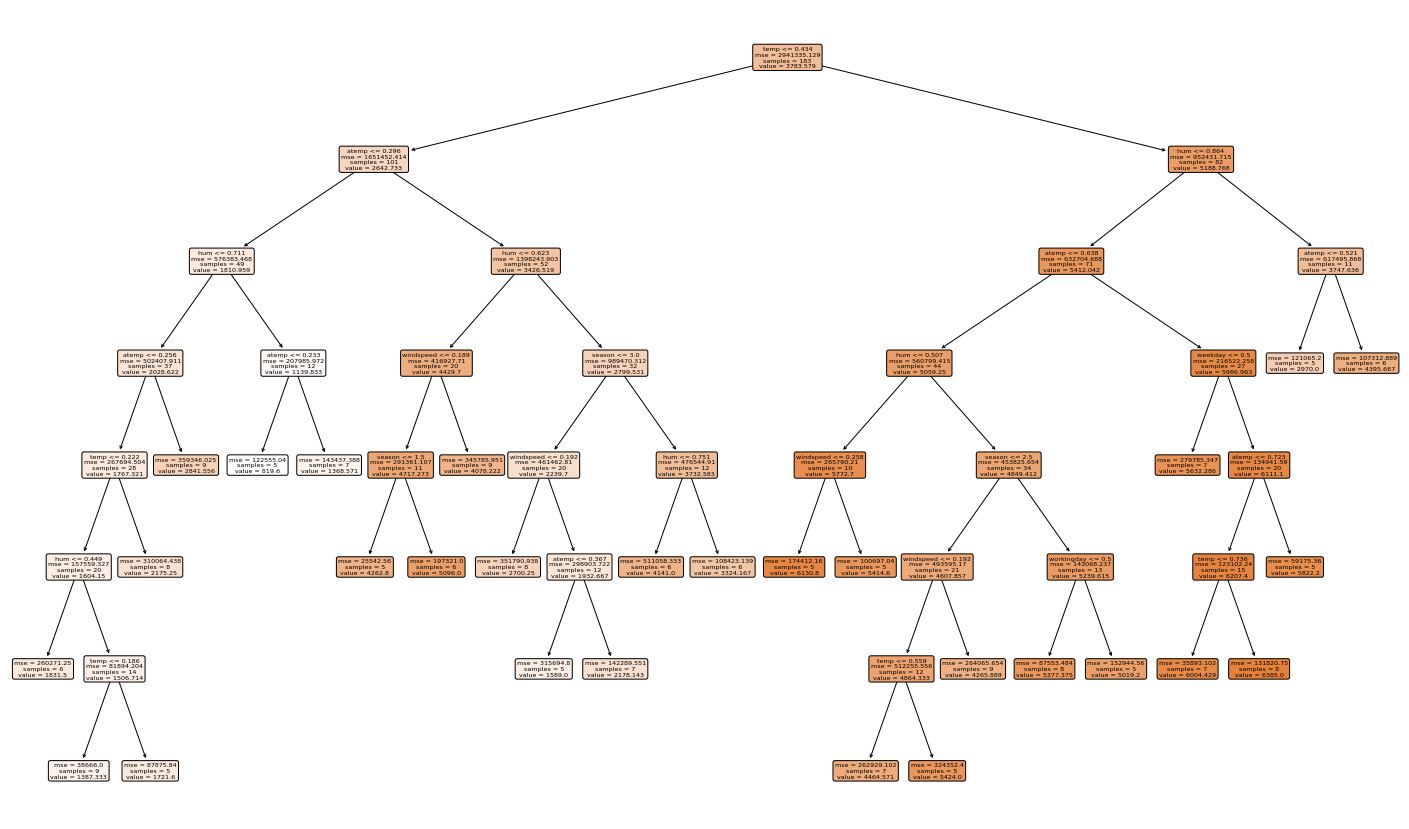

In [20]:
# Visualização gráfica da árvore de decisão
plt.subplots(figsize=(25, 15)) # Definir tamanho da imagem a ser gerada
plot_tree(model.best_estimator_, filled=True, rounded=True, feature_names=X_train.columns); # plota a árvore

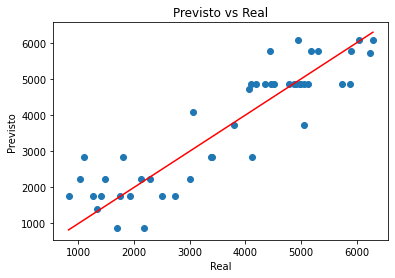

In [39]:
#previsto vs. real
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

##Machine Learning: Random Forest

In [40]:
# treinar modelo
from sklearn.ensemble import RandomForestRegressor

def train_and_predict(X_train, y_train, X_test):
  model = RandomForestRegressor()
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste
  return model, y_pred

model, y_pred = train_and_predict(X_train, y_train, X_test)

In [41]:
print('Teste')
evaluate(y_test, y_pred, X_test)

print('\nTreino')
y_train_pred = model.predict(X_train)
evaluate(y_train, y_train_pred, X_train)

Teste
R2:  0.8899465442244406
R2 ajustado:  0.8231283746464224

Treino
R2:  0.9828880572221124
R2 ajustado:  0.9811250085722694


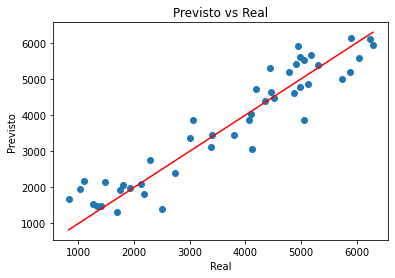

In [42]:
#previsto vs. real
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x